# Assignment 3


**Implementation of RNN(LSTM) for MNIST dataset**

In [1]:
# importing required libraries
import tensorflow as tf
from tensorflow import keras as k
from keras import layers as l
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing dataset
dataset=k.datasets.mnist


In [3]:
(x_train,y_train),(x_test,y_test)=dataset.load_data()

In [4]:
print(x_train.shape)
x_test.shape

(60000, 28, 28)


(10000, 28, 28)

In [5]:
# Studying values of random elements 
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

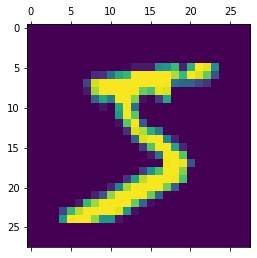

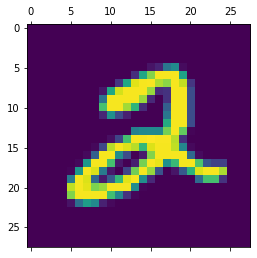

In [6]:
# Visualizing data
plt.matshow(x_train[0])
plt.matshow(x_train[5])

The digit 5 and 2

In [7]:
# The values of in the matrix varies from 0 to 255
# Therefore we scale the arrays with 255 for better acccuracy 
x_train=x_train/255
x_test=x_test/255

In [8]:
# reshaping our input as per the requirements of LSTM model 
# new size=(batch size=x_train.shape[0]=60000,value to be mapped=1,features=28*28=784)

inputs=tf.reshape(x_train,(60000,1,784))


In [9]:
model=k.models.Sequential()
# adding 2 LSTM Layers followed by a Dropout ayer each
model.add(l.LSTM(units=64, input_shape=(1,784), return_sequences=True))
model.add(l.Dropout(0.2))
model.add(l.LSTM(units=64))
model.add(l.Dropout(0.2))
# The output layer with 10 as the final output size and sigmoid as the activation function a
model.add(l.Dense(units=10, activation='sigmoid'))

In [10]:
# choosing model parameters
model.compile(optimizer="Adam",
             loss="sparse_categorical_crossentropy",
             metrics="accuracy")

In [11]:
# providing the model our data and fitting it
history=model.fit(inputs,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3337 - accuracy: 0.9060
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1433 - accuracy: 0.9574
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1057 - accuracy: 0.9683
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0869 - accuracy: 0.9736
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0747 - accuracy: 0.9768
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9788
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0595 - accuracy: 0.9816
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9837
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9852
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.044

In [12]:
# After some hit and trail, I decided to go with sigmoid as activation function.
# I started observing accuray from epochs set as 5 and finally settled for 20.
# More epochs would take time with no considerable change in accuracy

In [13]:
predicted_val=model.evaluate(x_test.reshape(10000,1,784),y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0760 - accuracy: 0.9798


Text(0.5, 1.0, 'Loss')

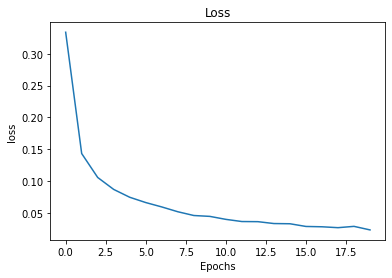

In [14]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.title("Loss")